In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [28]:
template_paths = {
    'ti_custom_prompt': 'semantic_drift/clip_alignment_scores_celebA_342_ti_gen_prompt_actions_{}_use_custom_prompt_remove_subject_and_glasses.csv',
    'ti_custom_prompt_B': 'semantic_drift/celebA_342_ti/clip_alignment_scores_celebA_342_ti_gen_prompt_actions_{}_use_custom_prompt_B.csv',
    'ti_full_prompt': 'semantic_drift/clip_alignment_scores_celebA_342_ti_gen_prompt_actions_{}_full_prompt.csv',
    'ti_vs_anchor': 'semantic_drift/clip_alignment_with_anchor_image_celebA_342_ti_gen_prompt_actions_{}_416.csv',
    'ti_vs_keyword': 'semantic_drift/celebA_342_ti/clip_alignment_scores_celebA_342_ti_a photo of Henry Cavill_{}_keyword_Henry_Cavill.csv',
    'ti_vs_anchor_t01': 'semantic_drift/celebA_342_ti/clip_alignment_with_anchor_image_celebA_342_ti_gen_prompt_actions_{}_t01.csv', # Use t01 as anchor image
    'db_custom_prompt': 'semantic_drift/clip_alignment_scores_celebA_342_db_lora_lr1e-4_gen_prompt_actions_gen_prompt_actions_use_custom_prompt_remove_subject_and_glasses_step_{}.csv',
    'db_full_prompt': 'semantic_drift/clip_alignment_scores_celebA_342_db_lora_lr1e-4_gen_prompt_actions_gen_prompt_actions_full_prompt_step_{}.csv',
    'db_vs_anchor': 'semantic_drift/clip_alignment_with_anchor_image_celebA_342_db_lora_lr1e-4_gen_prompt_actions_gen_prompt_actions_416_step_{}.csv',
    'db_text_encoder_custom_prompt': 'semantic_drift/celebA_342_db_lora_lr1e-4_rank4_train_text_encoder/clip_alignment_scores_celebA_342_db_lora_lr1e-4_rank4_train_text_encoder_gen_prompt_actions_use_custom_prompt_remove_subject_and_glasses_step_{}.csv',
    'db_text_encoder_custom_prompt_B': 'semantic_drift/celebA_342_db_lora_lr1e-4_rank4_train_text_encoder/{}/clip_alignment_scores_celebA_342_db_lora_lr1e-4_rank4_train_text_encoder_gen_prompt_actions_use_custom_prompt_objectA.csv',
    'db_text_encoder_full_prompt': 'semantic_drift/celebA_342_db_lora_lr1e-4_rank4_train_text_encoder/clip_alignment_scores_celebA_342_db_lora_lr1e-4_rank4_train_text_encoder_gen_prompt_actions_full_prompt_step_{}.csv',
    'db_text_encoder_vs_anchor': 'semantic_drift/celebA_342_db_lora_lr1e-4_rank4_train_text_encoder/clip_alignment_with_anchor_image_celebA_342_db_lora_lr1e-4_rank4_train_text_encoder_gen_prompt_actions_416_step_{}.csv',
}


baseline_paths = {
    'standard_man_full_prompt': 'semantic_drift/standard_man/clip_alignment_scores_standard_man_gen_prompt_actions_full_prompt.csv',
    'standard_man_custom_prompt': 'semantic_drift/standard_man/clip_alignment_scores_standard_man_gen_prompt_actions_use_custom_prompt_remove_subject_and_glasses.csv',
    'standard_man_custom_prompt_B': 'semantic_drift/standard_man/clip_alignment_scores_standard_man_gen_prompt_actions_use_custom_prompt_B.csv',
    'standard_man_vs_anchor_t01': 'semantic_drift/standard_man/clip_alignment_with_anchor_image_standard_man_gen_prompt_actions_t01.csv',
    'standard_woman_full_prompt': 'semantic_drift/standard_woman/clip_alignment_scores_standard_woman_gen_prompt_actions_full_prompt.csv',
    'standard_woman_custom_prompt': 'semantic_drift/standard_woman/clip_alignment_scores_standard_woman_gen_prompt_actions_use_custom_prompt_remove_subject_and_glasses.csv',
    'standard_woman_vs_anchor_t01': 'semantic_drift/standard_woman/clip_alignment_with_anchor_image_standard_woman_gen_prompt_actions_t01.csv',
    'standard_henry_cavill_full_prompt': 'semantic_drift/standard_henry_cavill/clip_alignment_scores_standard_henry_cavill_gen_prompt_actions_full_prompt.csv',
    'standard_henry_cavill_custom_prompt': 'semantic_drift/standard_henry_cavill/clip_alignment_scores_standard_henry_cavill_gen_prompt_actions_use_custom_prompt_remove_subject_and_glasses.csv',
    'standard_henry_cavill_custom_prompt_B': 'semantic_drift/standard_henry_cavill/clip_alignment_scores_standard_henry_cavill_gen_prompt_actions_use_custom_prompt_B.csv',
    'standard_henry_cavill_vs_anchor_t01': 'semantic_drift/standard_henry_cavill/clip_alignment_with_anchor_image_standard_henry_cavill_gen_prompt_actions_t01.csv',
    
}

all_paths = {}
for key, path in template_paths.items():
    all_paths[key] = {}
    for i in range(3000):
        _path = path.format(i)
        if os.path.isfile(_path):
            all_paths[key][i] = _path
    # all_paths[key] = dict(sorted(all_paths[key].items()))
    print(f'{key} has {len(all_paths[key])} paths', list(all_paths[key].keys()))


all_results = dict()

for info in all_paths.keys():
    file_paths = all_paths[info]
    results = dict()
    for iteration in file_paths.keys():
        file_path = file_paths[iteration]
        df = pd.read_csv(file_path)

        # format: results.append({'prompt_index': prompt_index, 'prompt': prompt, 'image_index': image_index, 'score': score})

        # calculate the mean and std of the scores for each prompt
        results[iteration] = dict()

        for prompt_index in list(df['prompt_index'].unique()):
            prompt_df = df[df['prompt_index'] == prompt_index]
            # print(f'Prompt: {prompt}')
            # print(f"Mean: {prompt_df['score'].mean()}")
            # print(f"Std: {prompt_df['score'].std()}")
            # print(f"Min: {prompt_df['score'].min()}")
            # print(f"Max: {prompt_df['score'].max()}")
            # print(f"Median: {prompt_df['score'].median()}")
            # print("--------------------------------")
            results[iteration][prompt_index] = {
                'prompt': prompt_df['prompt'].iloc[0],
                'mean': prompt_df['score'].mean(),
                'std': prompt_df['score'].std(),
                'min': prompt_df['score'].min(),
                'max': prompt_df['score'].max(),
                'median': prompt_df['score'].median()
            }
    all_results[info] = results

baseline_results = {}
for key, path in baseline_paths.items():
    results = dict()
    file_path = baseline_paths[key]
    assert os.path.isfile(file_path)
    
    df = pd.read_csv(file_path)

    for prompt_index in list(df['prompt_index'].unique()):
        prompt_df = df[df['prompt_index'] == prompt_index]
        results[prompt_index] = {
            'prompt': prompt_df['prompt'].iloc[0],
            'mean': prompt_df['score'].mean(),
            'std': prompt_df['score'].std(),
            'min': prompt_df['score'].min(),
            'max': prompt_df['score'].max(),
            'median': prompt_df['score'].median()
        }
    baseline_results[key] = results



ti_custom_prompt has 9 paths [100, 200, 300, 400, 500, 600, 700, 800, 900]
ti_custom_prompt_B has 9 paths [100, 200, 300, 400, 500, 600, 700, 800, 900]
ti_full_prompt has 9 paths [100, 200, 300, 400, 500, 600, 700, 800, 900]
ti_vs_anchor has 9 paths [100, 200, 300, 400, 500, 600, 700, 800, 900]
ti_vs_keyword has 9 paths [100, 200, 300, 400, 500, 600, 700, 800, 900]
ti_vs_anchor_t01 has 9 paths [100, 200, 300, 400, 500, 600, 700, 800, 900]
db_custom_prompt has 8 paths [50, 100, 200, 300, 400, 500, 600, 700]
db_full_prompt has 8 paths [50, 100, 200, 300, 400, 500, 600, 700]
db_vs_anchor has 8 paths [50, 100, 200, 300, 400, 500, 600, 700]
db_text_encoder_custom_prompt has 10 paths [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
db_text_encoder_custom_prompt_B has 10 paths [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
db_text_encoder_full_prompt has 10 paths [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
db_text_encoder_vs_anchor has 10 paths [200, 400, 600, 8

0


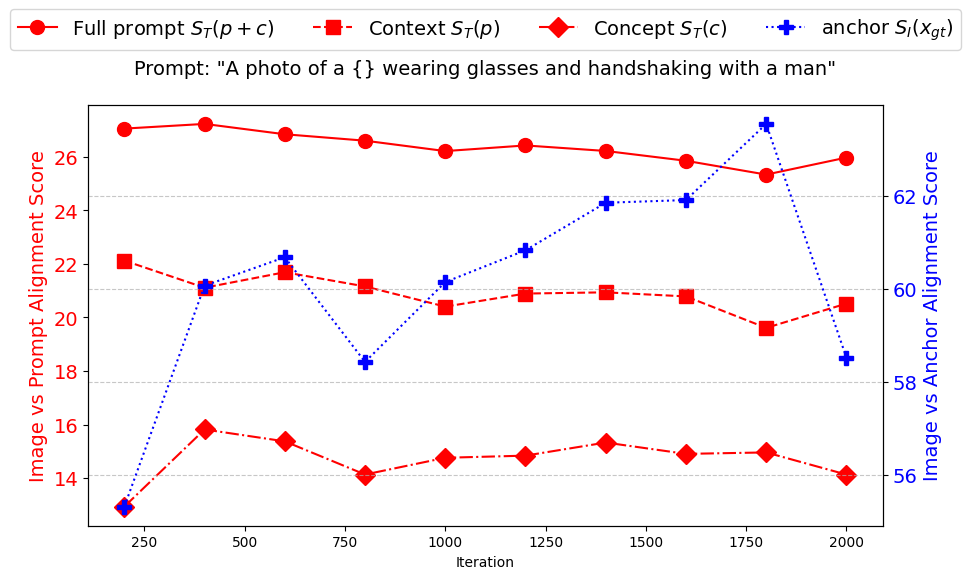

1


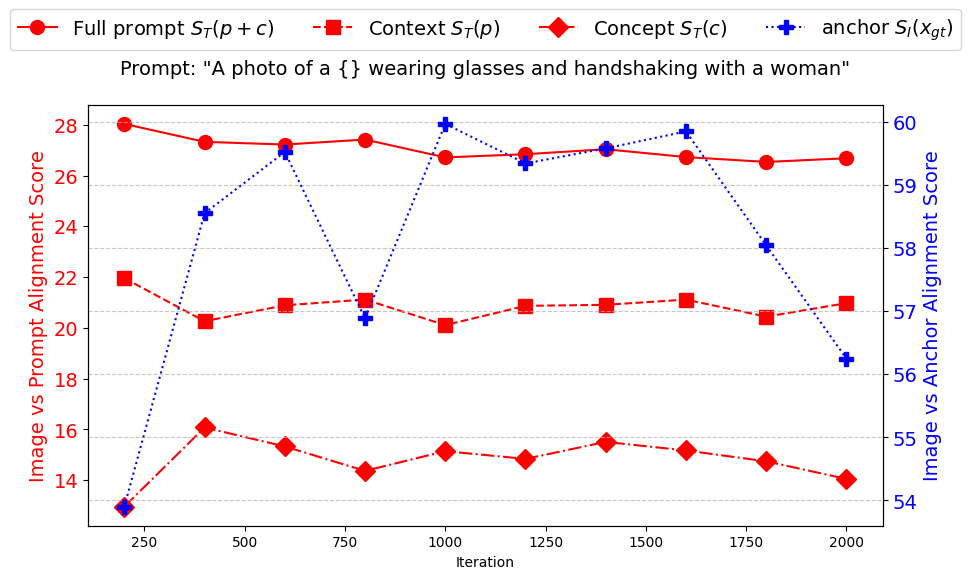

2


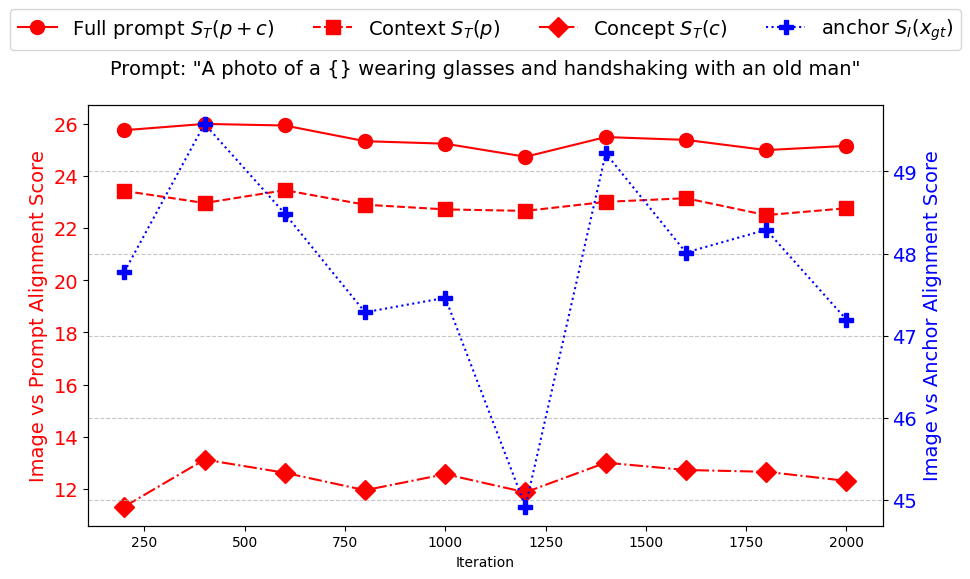

3


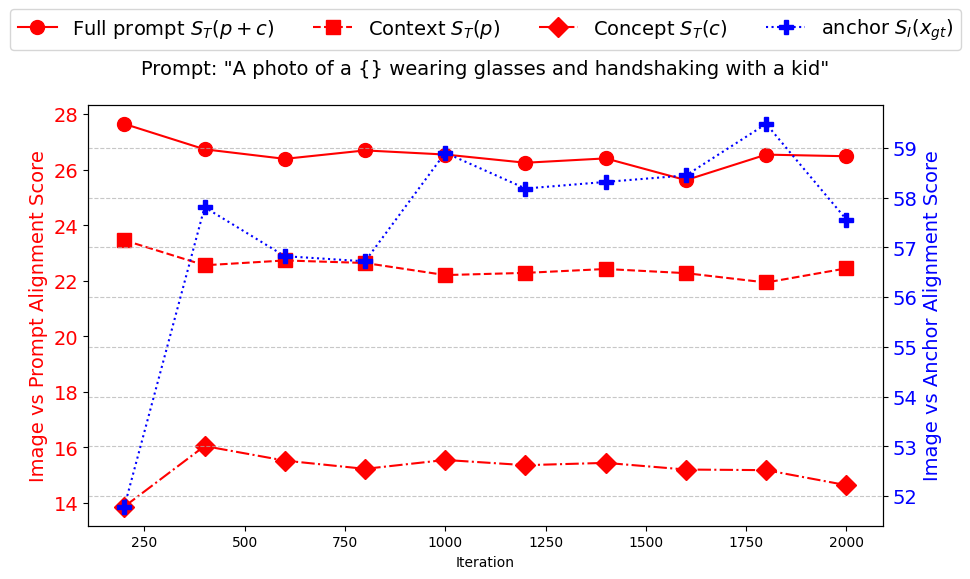

4


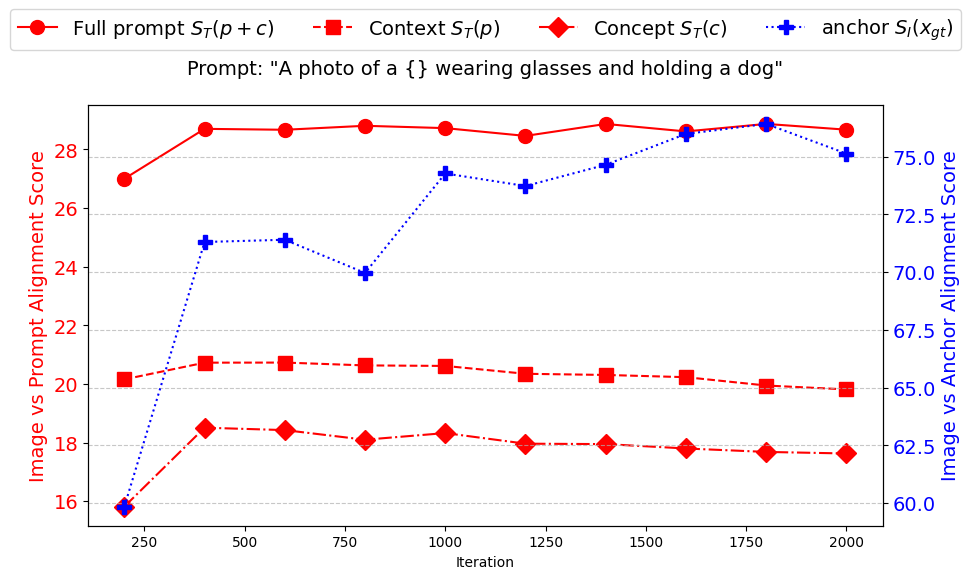

5


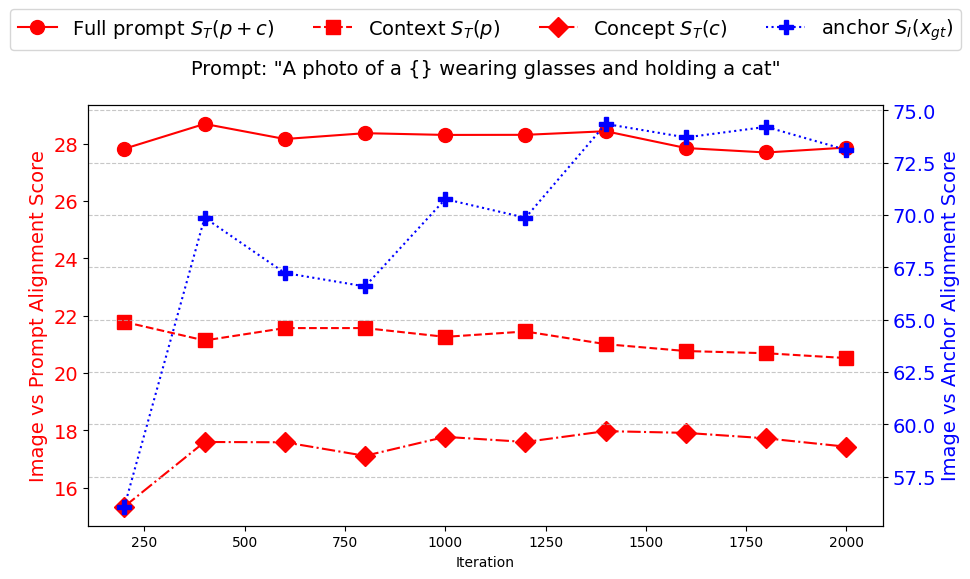

6


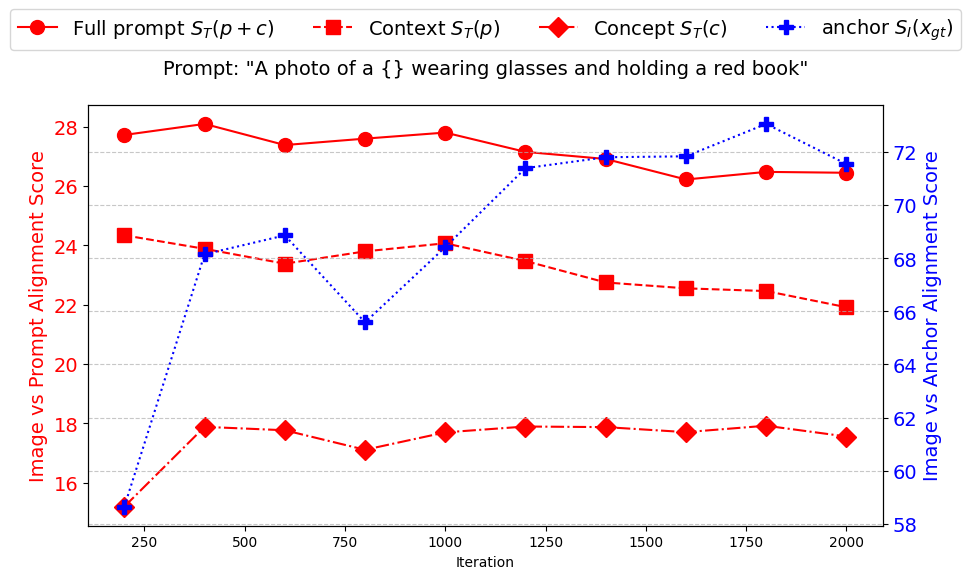

7


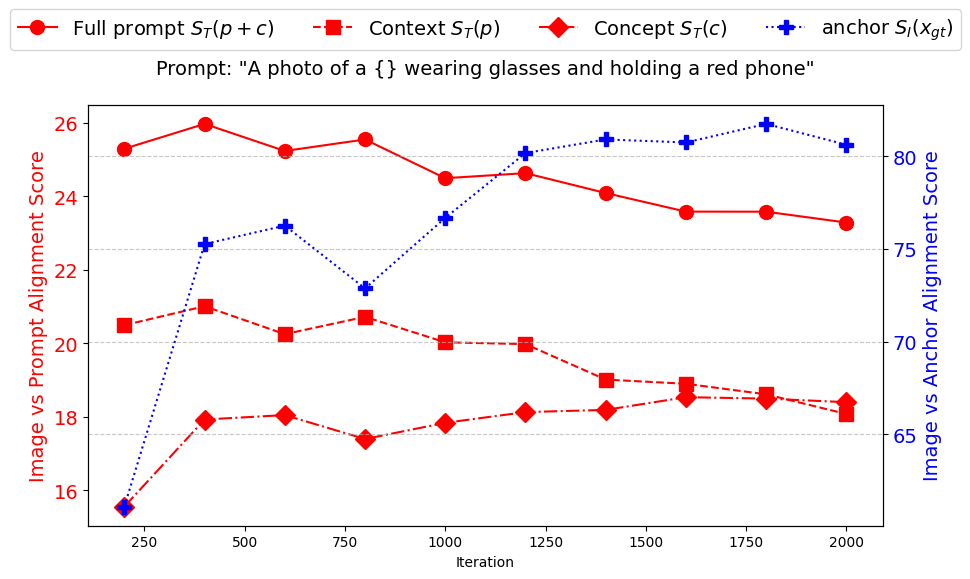

8


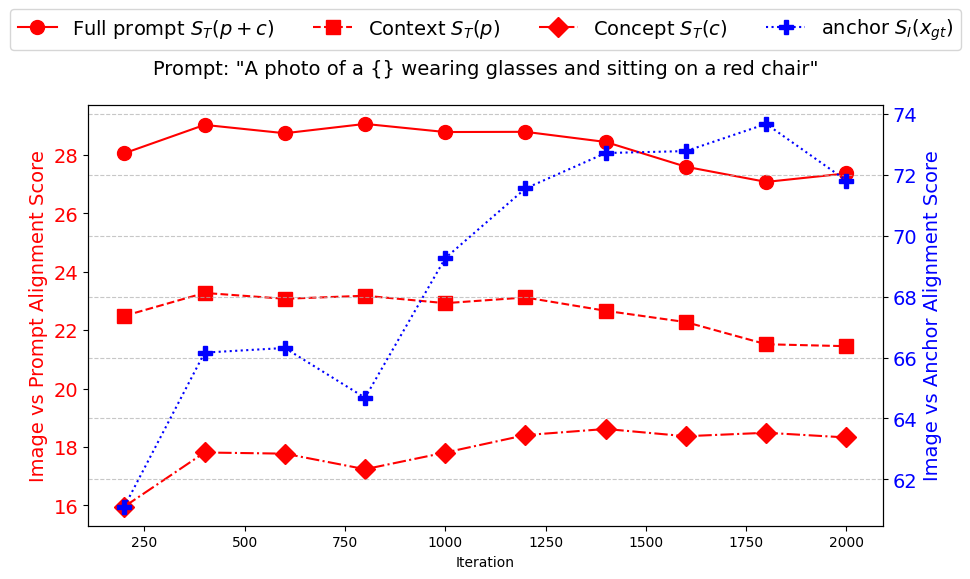

9


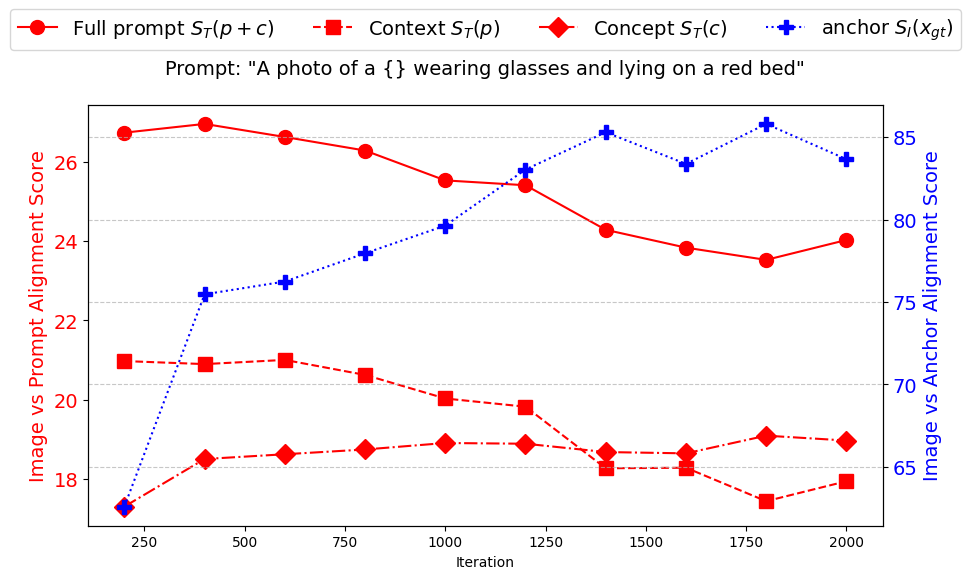

10


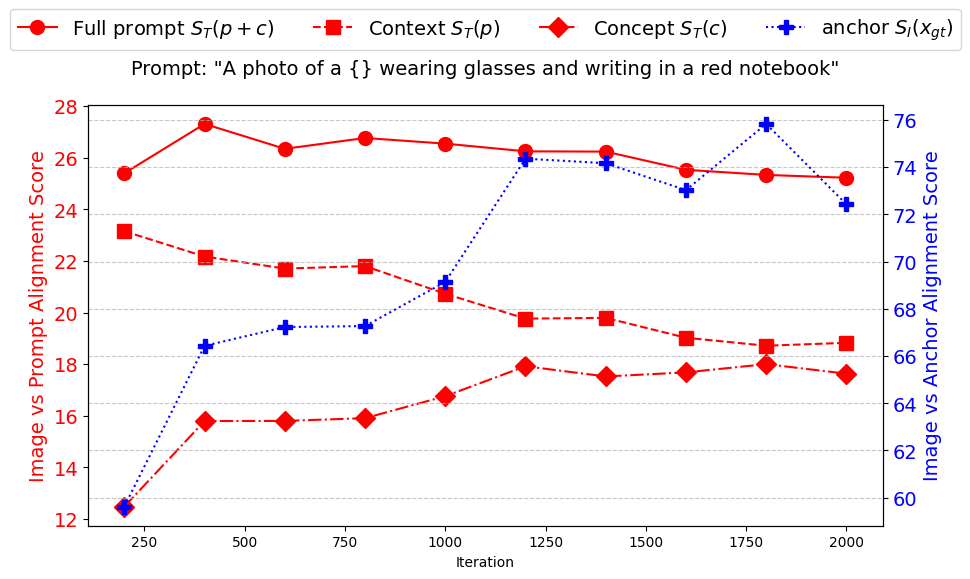

11


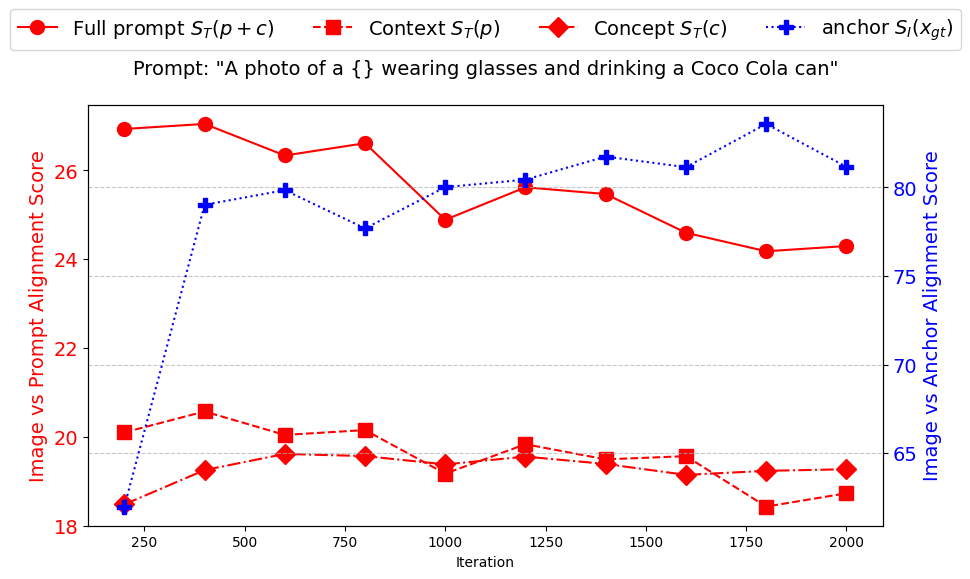

12


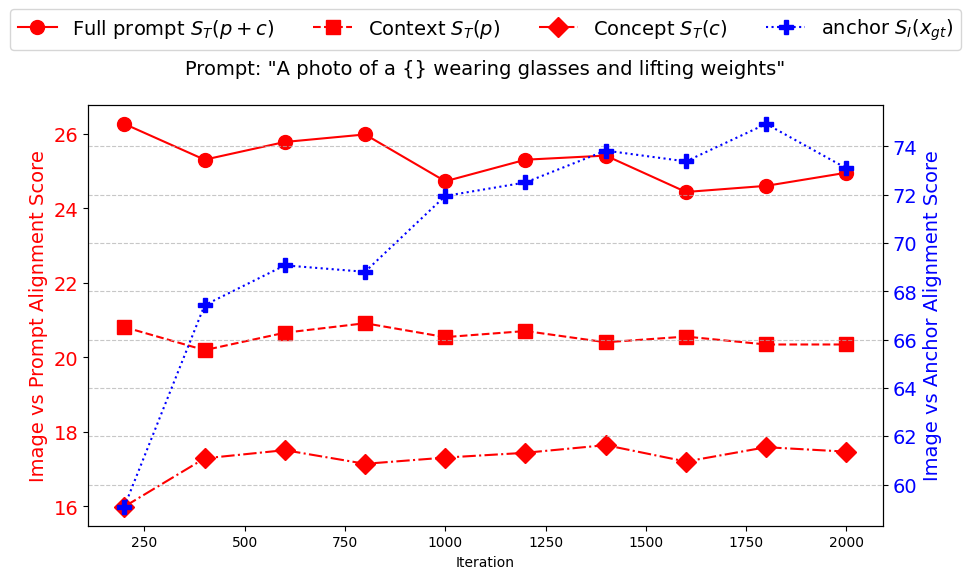

13


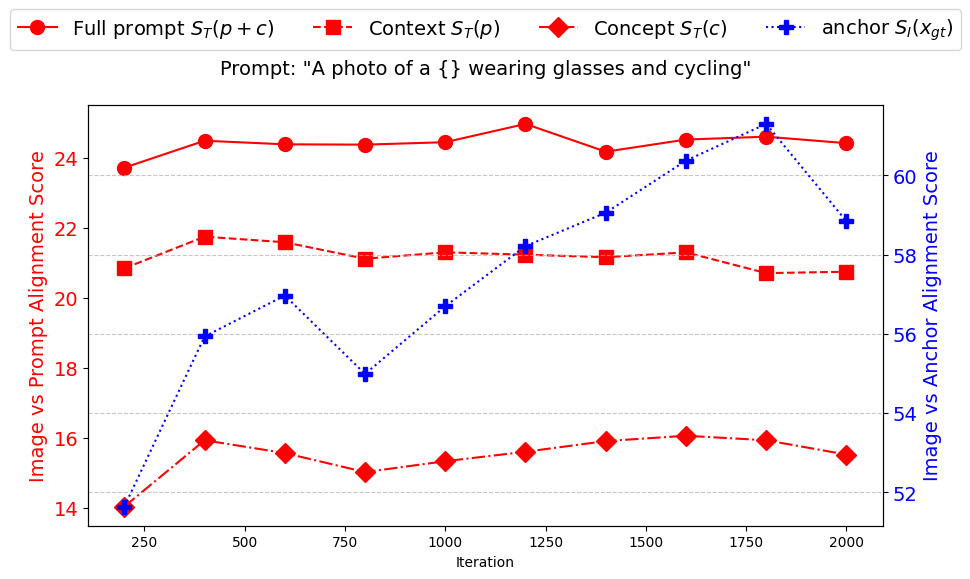

14


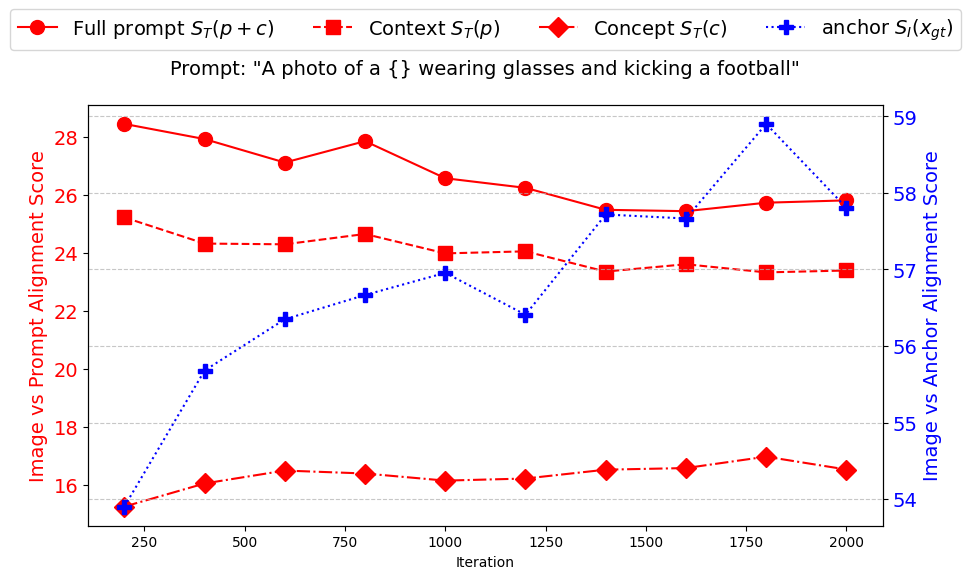

15


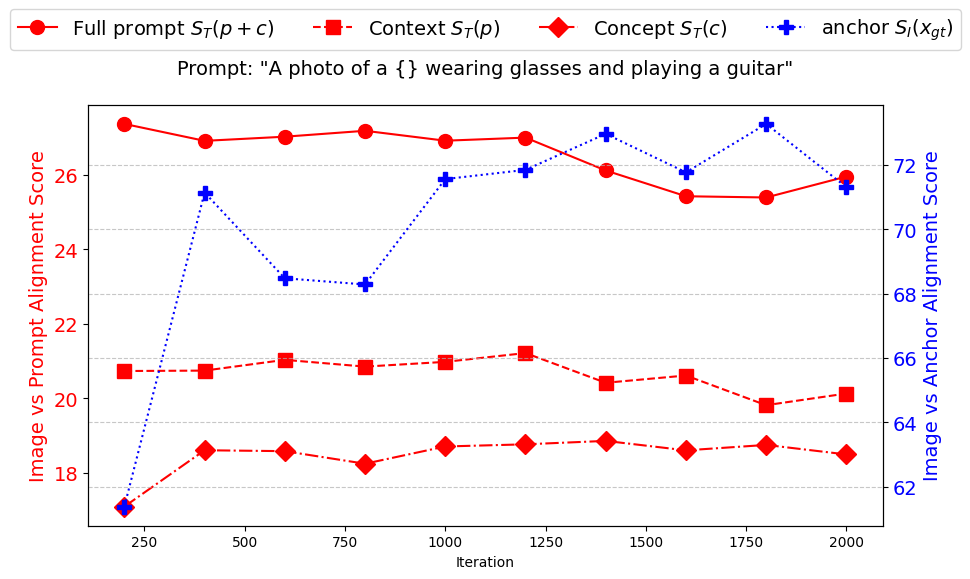

16


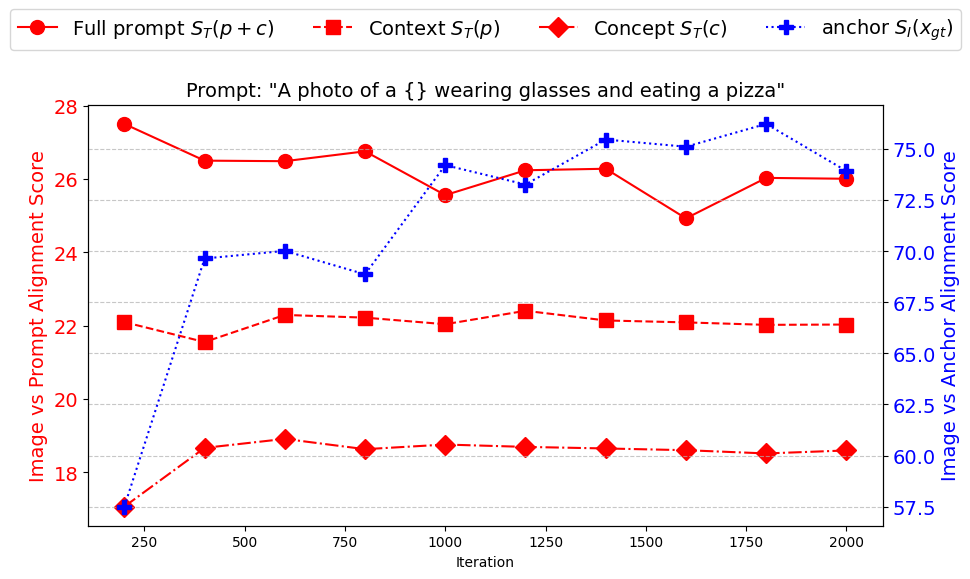

In [29]:
ref_index = 100
# colors = plt.cm.rainbow(np.linspace(0, 1, len(results[ref_index].keys())))
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'brown', 'pink', 'gray', 'black', 'white', 'cyan', 'magenta', 'lime', 'olive', 'teal', 'navy', 'maroon', 'gold', 'silver', 'indigo', 'turquoise', 'coral', 'khaki', 'lime', 'olive', 'teal', 'navy', 'maroon', 'gold', 'silver', 'indigo', 'turquoise', 'coral', 'khaki']
markers = ['o', 's', 'D', 'P', 'X', 'H', 'v', '^', '<', '>', 'p', '*', 'h', '8', '1', '2', '3', '4', '5', '6', '7', '9', '10']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']

# info_list = ['ti_full_prompt', 'ti_custom_prompt', 'ti_custom_prompt_B', 'ti_vs_anchor']
info_list = ['db_text_encoder_full_prompt', 'db_text_encoder_custom_prompt', 'db_text_encoder_custom_prompt_B', 'db_text_encoder_vs_anchor']


# output_folder = 'results/clip_alignment_scores/celebA_342_ti'
# output_folder = 'results/clip_alignment_scores/celebA_342_db_lora'
output_folder = 'results/clip_alignment_scores/celebA_342_db_lora_lr1e-4_rank4_train_text_encoder'

anchor_info_list = ['ti_vs_anchor', 'ti_vs_anchor_t01', 
                    'db_vs_anchor', 
                    'db_text_encoder_vs_anchor',
                    'standard_man_vs_anchor_t01', 'standard_woman_vs_anchor_t01', 'standard_henry_cavill_vs_anchor_t01']

# standard_list = ['standard_man_vs_anchor_t01', 'standard_woman_vs_anchor_t01', 'standard_henry_cavill_vs_anchor_t01']

def assign_label(label):
    if 'full_prompt' in label:
        return r'Full prompt $S_T(p+c)$'
    elif 'custom_prompt_B' in label:
        return r'Concept $S_T(c)$'
    elif 'custom_prompt' in label:
        return r'Context $S_T(p)$'
    elif 'vs_anchor' in label:
        return r'anchor $S_I(x_{gt})$'
    else:
        return label
    

os.makedirs(output_folder, exist_ok=True)

for prompt_index in range(20):

    if prompt_index not in list(all_results[info_list_1[0]][100].keys()):
        continue 

    print(prompt_index)
    # given the same prompt index, plot the scores for all settings in the all_results
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ci = -1


    # Plot first set of data on left y-axis
    for info in info_list:
        if info not in anchor_info_list:
            ci += 1
            temp = []
            iteration_keys = list(all_results[info].keys())
            for iteration in iteration_keys:
                temp.append(all_results[info][iteration][prompt_index]['mean'])
            ax1.plot(iteration_keys, temp, label=assign_label(info), color='r', marker=markers[ci], linestyle=line_styles[ci], markersize=10)

    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Image vs Prompt Alignment Score', color='r', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='r', labelsize=14)

    # Create second y-axis and plot data
    ax2 = ax1.twinx()
    for info in info_list:
        if info not in anchor_info_list:
            continue
        if info in all_results:
            ci += 1
            temp = []
            iteration_keys = list(all_results[info].keys())
            for iteration in iteration_keys:
                temp.append(all_results[info][iteration][prompt_index]['mean'])
            ax2.plot(iteration_keys, temp, label=assign_label(info), color='b', marker=markers[ci], linestyle=line_styles[ci], markersize=10)

    ax2.set_ylabel('Image vs Anchor Alignment Score', color='b', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='b', labelsize=14)

    # Add legends for both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=8, fontsize=14)

    # plt.title(f'Full prompt: {all_results["ti_full_prompt"][ref_index][prompt_index]["prompt"]}\nCustom prompt: {all_results["ti_custom_prompt"][ref_index][prompt_index]["prompt"]}')
    plt.title(f'Prompt: {all_results["ti_full_prompt"][ref_index][prompt_index]["prompt"]}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f'all_settings_prompt_{prompt_index}.png'), bbox_inches='tight')
    plt.show()
    # plt.close()

In [37]:
checkpoint_index = 900

result_paths = {}
result_paths[checkpoint_index] = {
    'full_prompt': 'semantic_drift/celebA_342_adjust_norm_v1_{}/clip_alignment_scores_celebA_342_adjust_norm_v1_rho{}_gen_prompt_actions_full_prompt.csv', 
    't01': 'semantic_drift/celebA_342_adjust_norm_v1_{}/clip_alignment_with_anchor_image_celebA_342_adjust_norm_v1_rho{}_gen_prompt_actions_t01.csv', 
    'custom_prompt_A': 'semantic_drift/celebA_342_adjust_norm_v1_{}/clip_alignment_scores_celebA_342_adjust_norm_v1_rho{}_gen_prompt_actions_use_custom_prompt_A.csv', 
    'custom_prompt_B': 'semantic_drift/celebA_342_adjust_norm_v1_{}/clip_alignment_scores_celebA_342_adjust_norm_v1_rho{}_gen_prompt_actions_use_custom_prompt_B.csv', 
}

result_ours = {}
result_ours[checkpoint_index] = {}
for key in result_paths[checkpoint_index].keys():
    result_ours[checkpoint_index][key] = {}
    for rho in np.arange(0, 21, 0.1):
        if os.path.exists(result_paths[checkpoint_index][key].format(checkpoint_index, rho)):
            df = pd.read_csv(result_paths[checkpoint_index][key].format(checkpoint_index, rho))



            # calculate the mean and std of the scores for each prompt
            result_ours[checkpoint_index][key][rho] = dict()

            for prompt_index in list(df['prompt_index'].unique()):
                prompt_df = df[df['prompt_index'] == prompt_index]
                # print(f'Prompt: {prompt}')
                # print(f"Mean: {prompt_df['score'].mean()}")
                # print(f"Std: {prompt_df['score'].std()}")
                # print(f"Min: {prompt_df['score'].min()}")
                # print(f"Max: {prompt_df['score'].max()}")
                # print(f"Median: {prompt_df['score'].median()}")
                # print("--------------------------------")
                result_ours[checkpoint_index][key][rho][prompt_index] = {
                    'prompt': prompt_df['prompt'].iloc[0],
                    'mean': prompt_df['score'].mean(),
                    'std': prompt_df['score'].std(),
                    'min': prompt_df['score'].min(),
                    'max': prompt_df['score'].max(),
                    'median': prompt_df['score'].median()
                }

[25.337033138275146, 25.597595500946046, 27.209965801239015, 26.15416431427002, 26.35091089248657, 26.199319152832032, 26.019270801544188, 26.14415521621704, 26.02160472869873, 26.03991024017334, 25.97463592529297, 25.894027309417723, 25.923187561035157, 25.855762157440186, 25.735414867401122, 25.64685073852539, 25.6084845161438, 25.413620014190673, 25.36287124633789] [0.4415171732672266, 0.44300518380212284, 0.3132236287904611, 0.41054227818674055, 0.4237803852434814, 0.4329369039143626, 0.4410780077545182, 0.4228102988922022, 0.41518433338806615, 0.4238706416747223, 0.4165161192089517, 0.4234301970734813, 0.43371551745857473, 0.44834949033002786, 0.4620784116086304, 0.4570909016473123, 0.45655984422822515, 0.44484749628743603, 0.4936670289857619]
[22.515478591918946, 22.575663890838623, 22.85560314178467, 21.344225149154664, 21.660914754867555, 21.417432193756103, 21.222950801849365, 21.27944884300232, 21.22875301361084, 21.12171076774597, 21.064364433288574, 20.92386251449585, 20.92

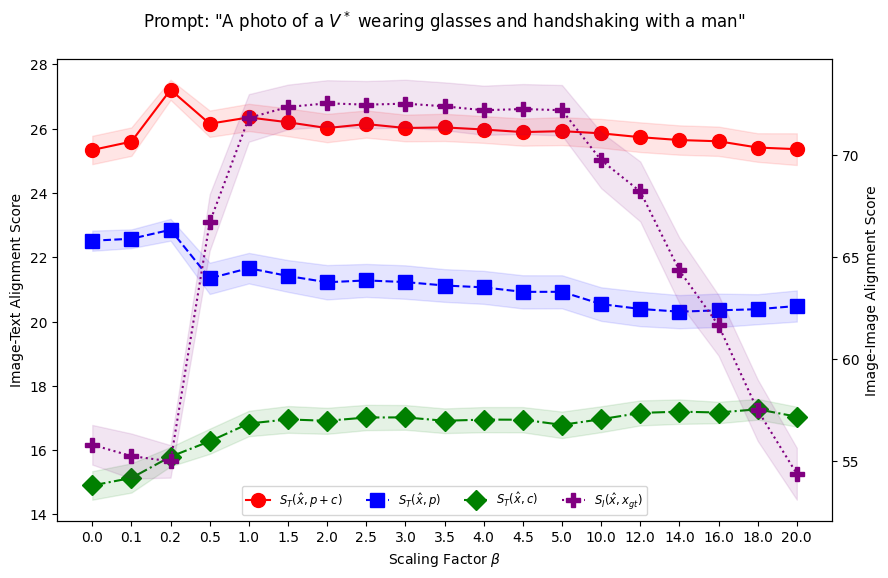

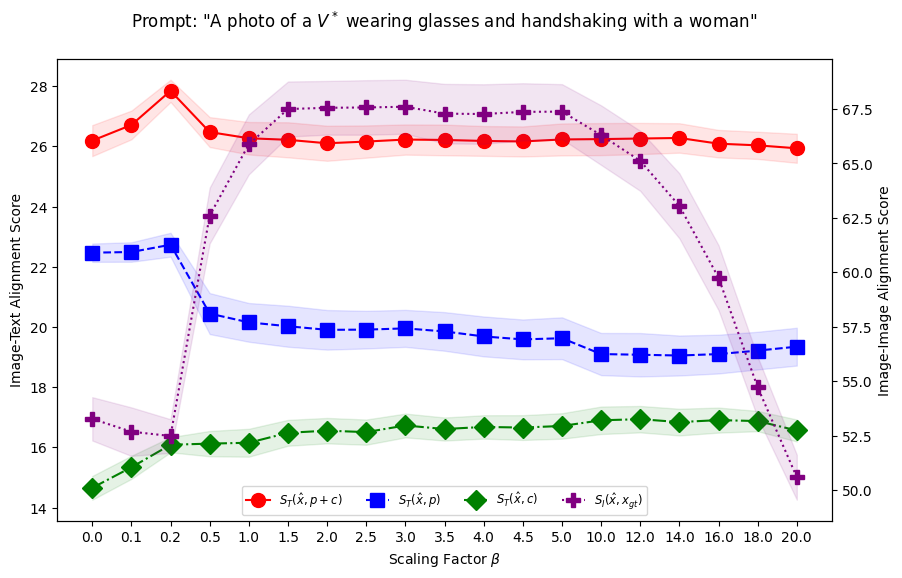

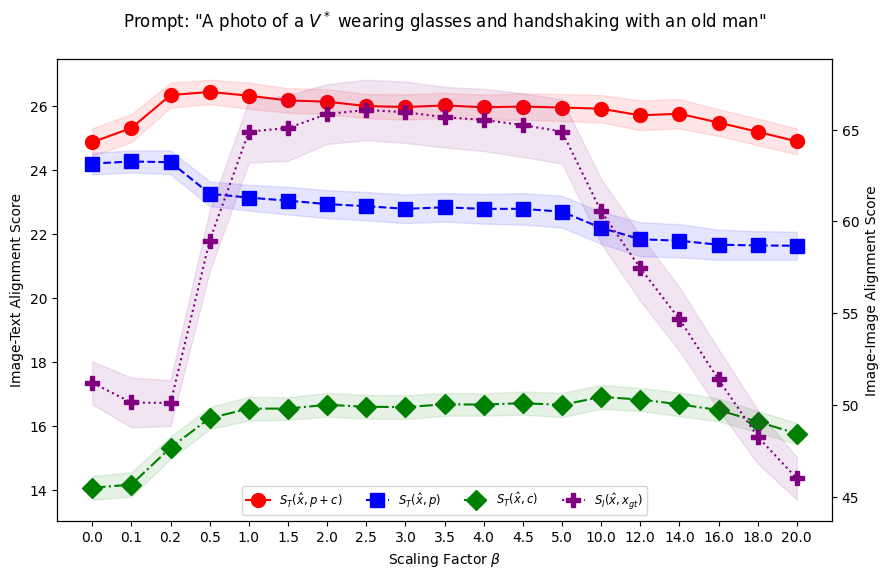

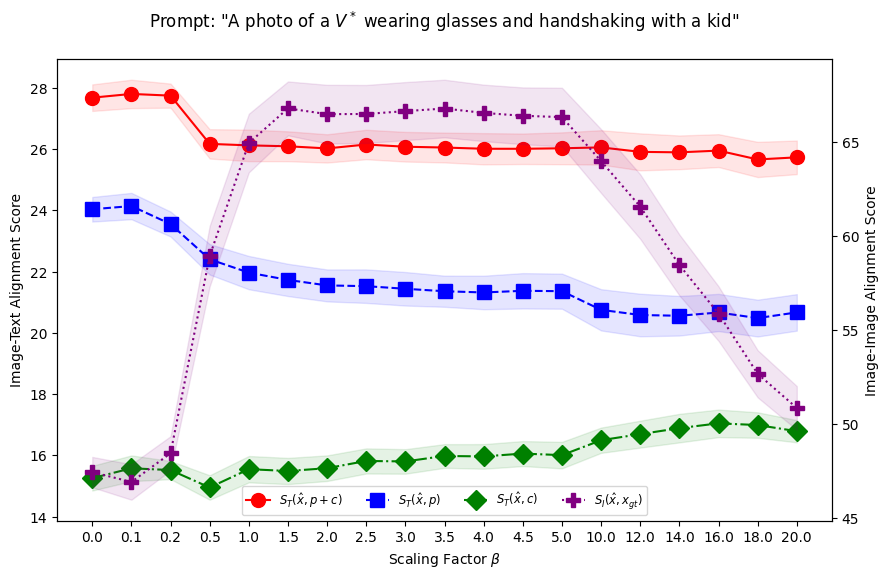

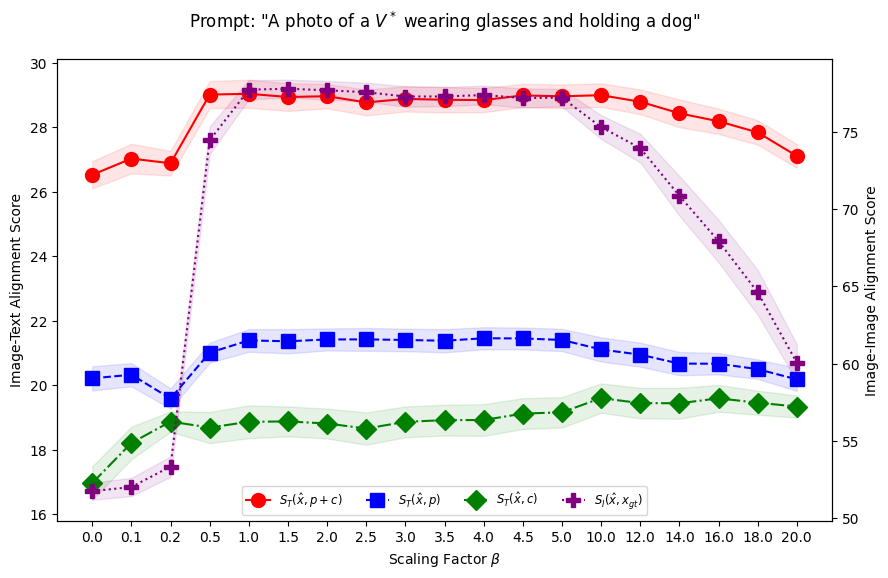

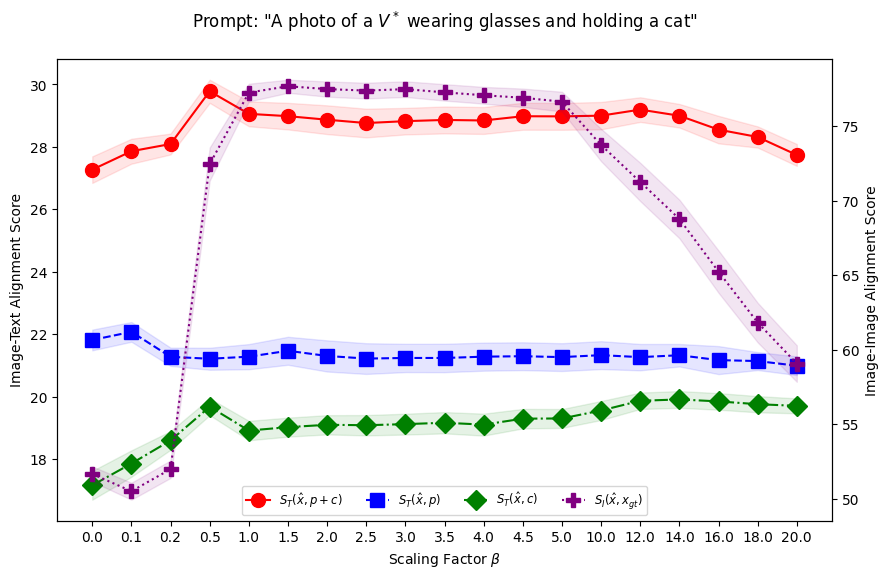

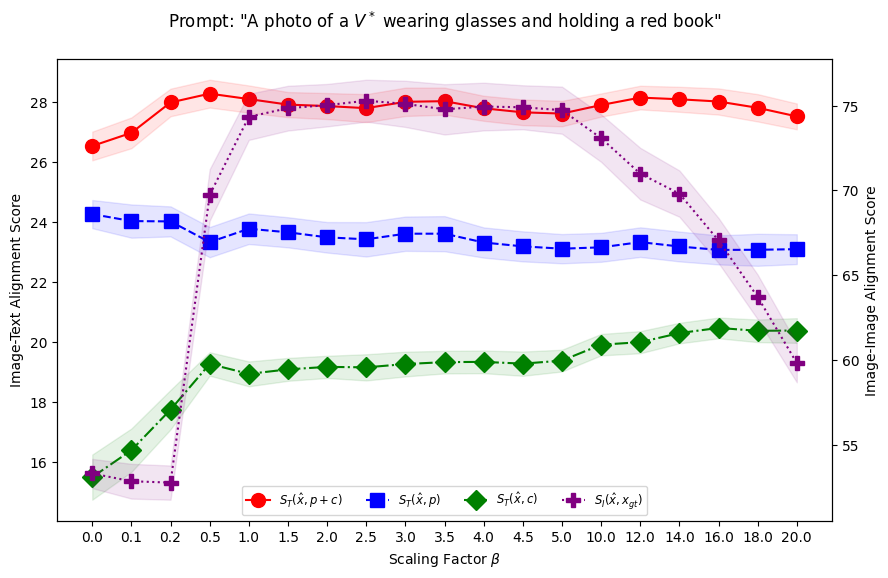

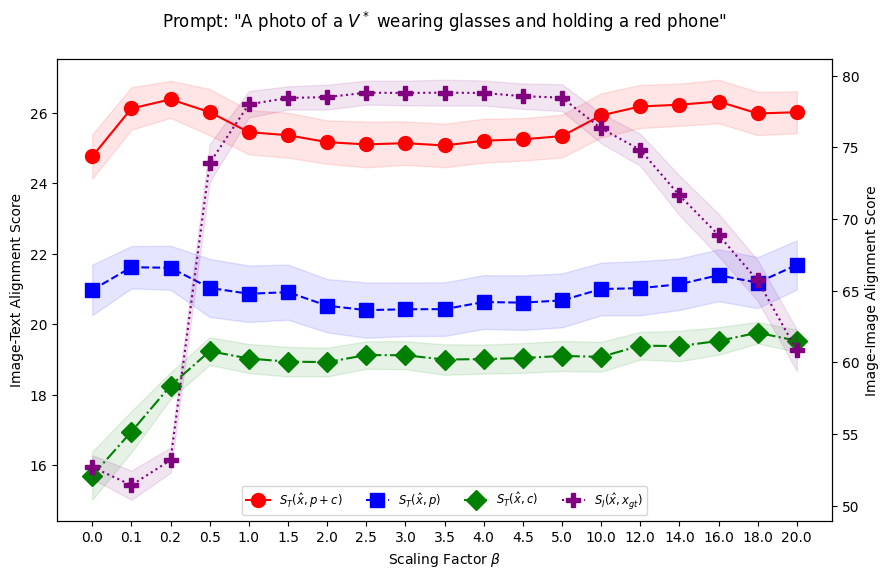

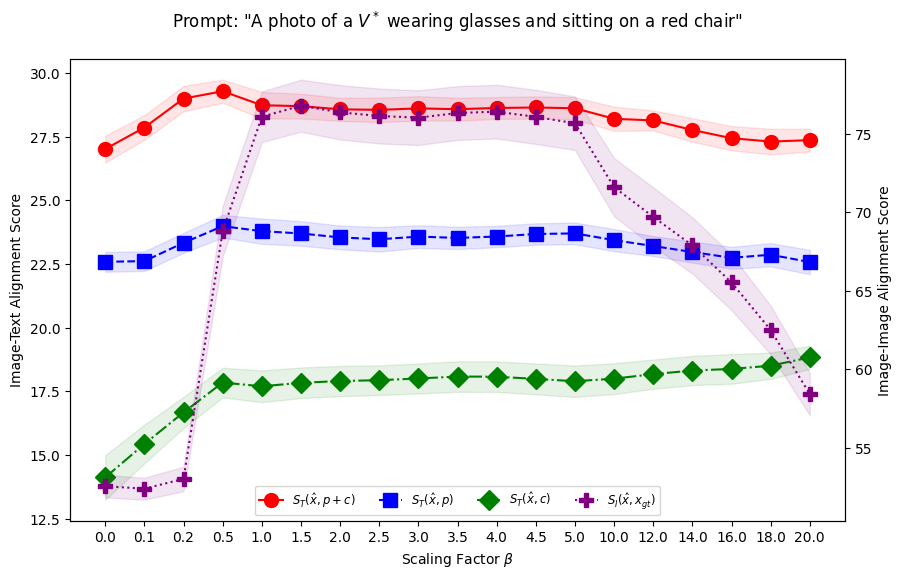

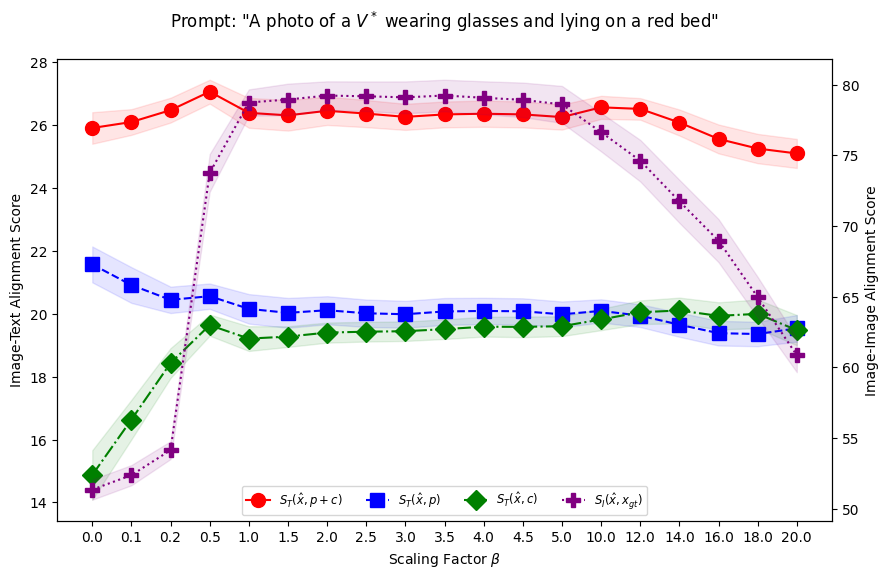

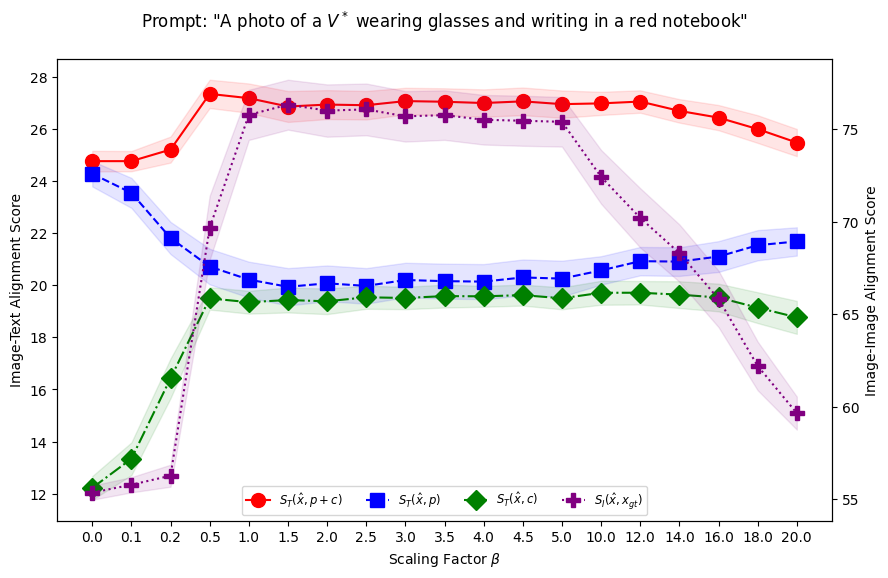

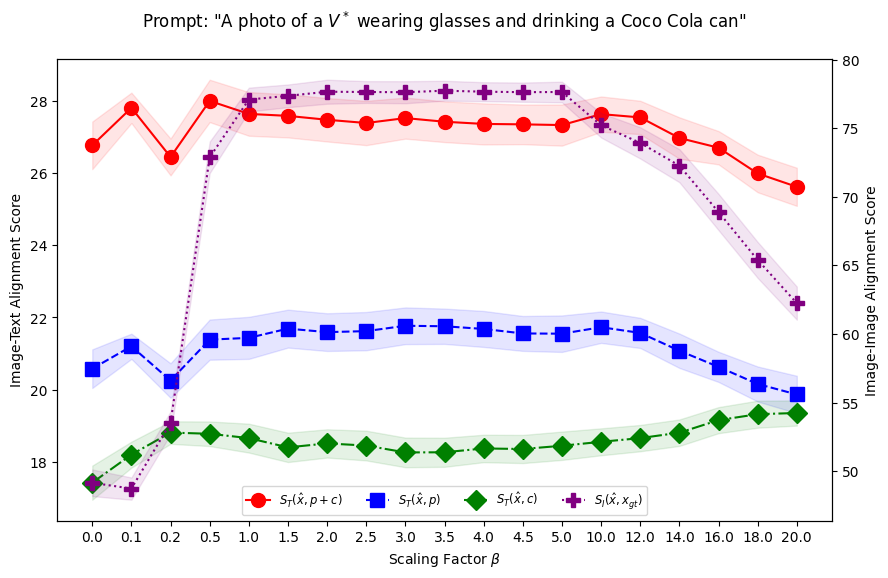

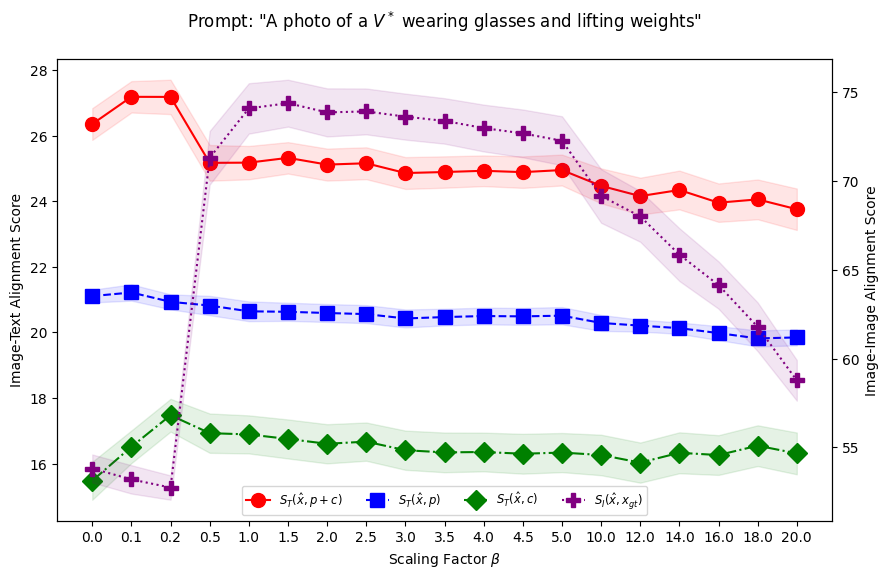

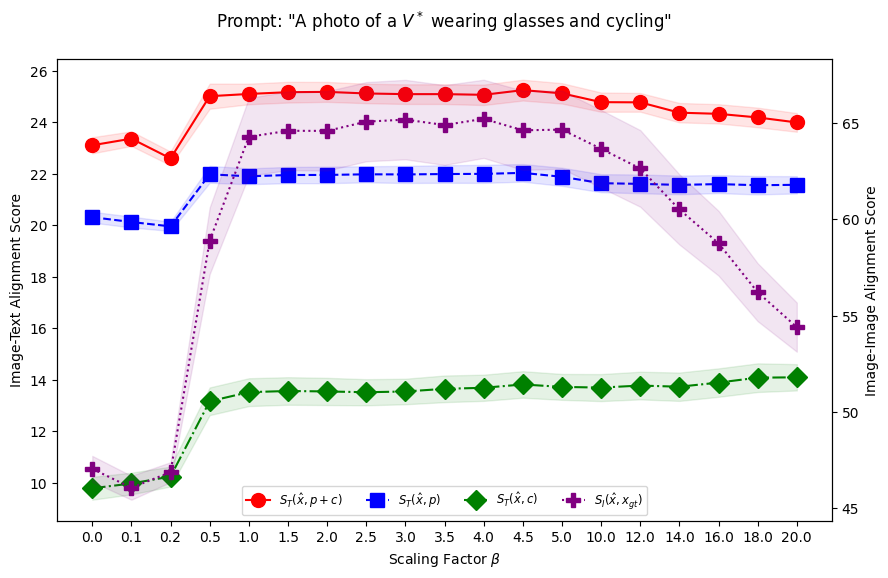

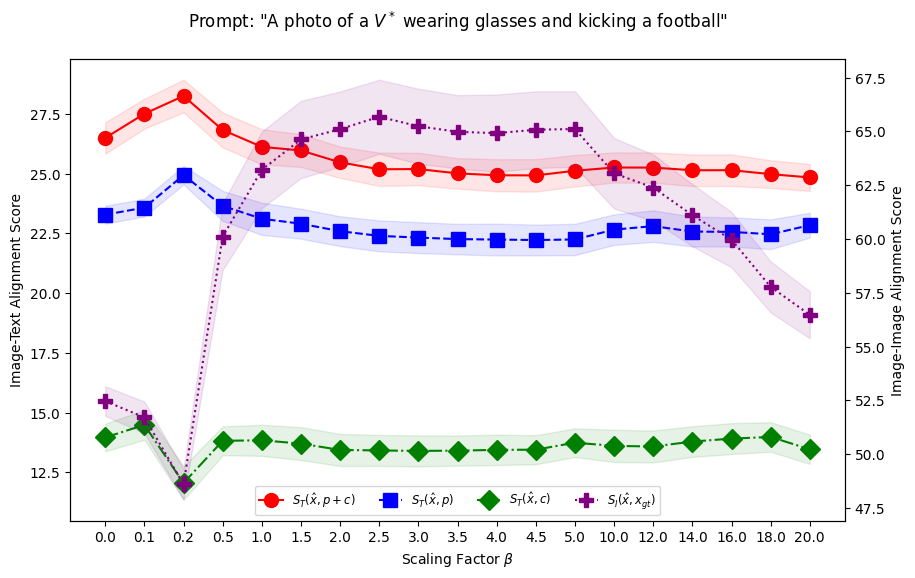

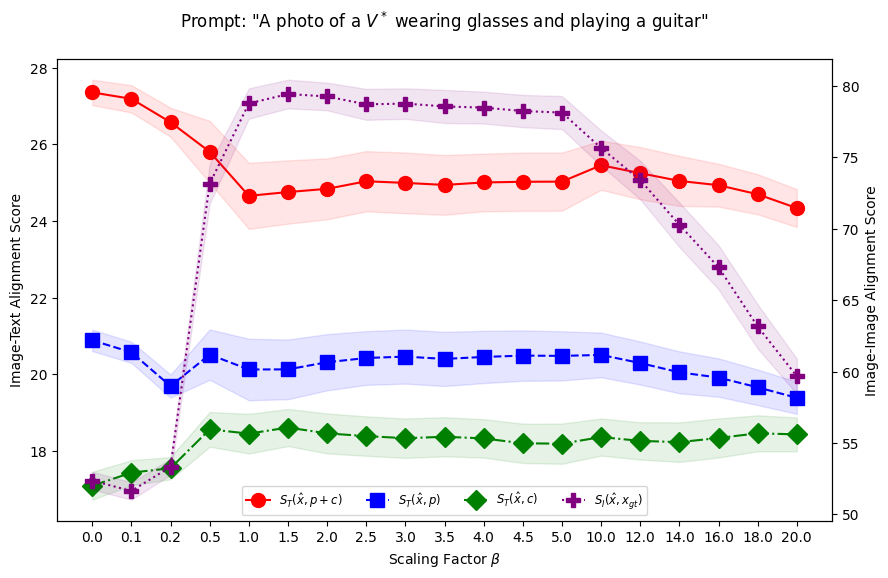

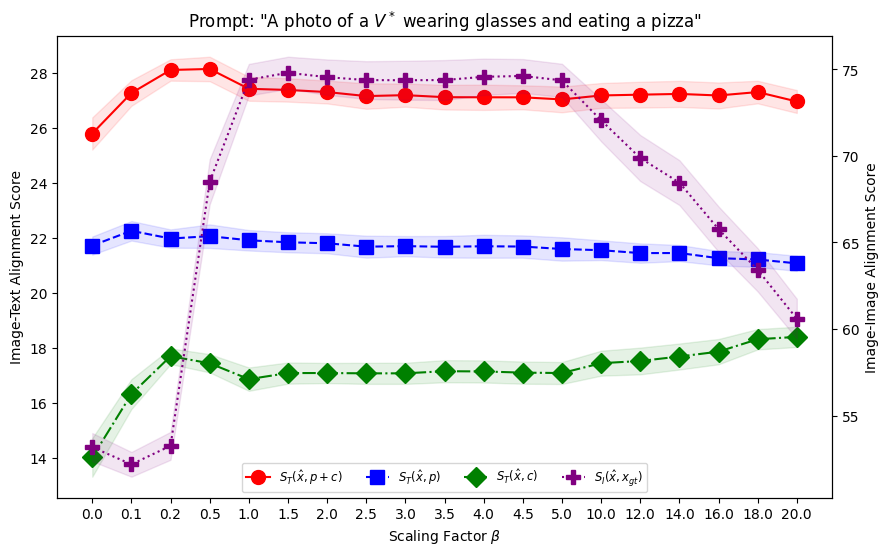

In [43]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'black', 'white', 'cyan', 'magenta', 'lime', 'olive', 'teal', 'navy', 'maroon', 'gold', 'silver', 'indigo', 'turquoise', 'coral', 'khaki']
markers = ['o', 's', 'D', 'P', 'X', 'H', 'v', '^', '<', '>', 'p', '*', 'h', '8', '1', '2', '3', '4', '5', '6', '7', '9', '10']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']

alpha = 0.1
scale_std = 0.2

def get_x_range(values):
    return range(len(values))
    # return values
    # return [convert_ration(rho) for rho in values]

def convert_ration(rho, norm_vector_to_project=0.89, norm_target_vector=0.37):
    # scaled_vector =  rho * norm_target_vector * vector_to_project / norm_vector_to_project (results from version 1)
    # the input values is rho and we want to convert to beta, (to match with notation in the paper)
    # where: scaled_vector = (beta * norm_vector_to_project + (1-beta) * norm_target_vector) * vector_to_project/norm_vector_to_project 
    # so rho * norm_target_vector = (beta * norm_vector_to_project + (1-beta) * norm_target_vector)
    # beta = (rho - 1) * norm_target_vector / (norm_vector_to_project - norm_target_vector)
    return round((rho - 1) * norm_target_vector / (norm_vector_to_project - norm_target_vector), 2)

def assign_label(metric):
    if metric == 'full_prompt':
        return r'$S_T(\hat{x}, p+c)$'
    elif metric == 'custom_prompt_A':
        return r'$S_T(\hat{x}, p)$'
    elif metric == 'custom_prompt_B':
        return r'$S_T(\hat{x}, c)$'
    elif metric == 't01':
        return r'$S_I(\hat{x}, x_{gt})$'
    else:
        return metric

for checkpoint_index in result_ours.keys():
    for prompt_index in result_ours[checkpoint_index]['full_prompt'][0.1].keys():
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111)
        ci = -1
        for metric in result_ours[checkpoint_index].keys():
            if metric == 't01':
                continue
            ci += 1
            # collect all mean and std for each prompt
            mean = []
            std = []
            for rho in result_ours[checkpoint_index][metric].keys():
                mean.append(result_ours[checkpoint_index][metric][rho][prompt_index]['mean'])
                std.append(result_ours[checkpoint_index][metric][rho][prompt_index]['std'] * scale_std)
            print(mean, std)
            ax.plot(get_x_range(result_ours[checkpoint_index][metric].keys()), mean, label=assign_label(metric), color=colors[ci], marker=markers[ci], linestyle=line_styles[ci], markersize=10)
            ax.fill_between(get_x_range(result_ours[checkpoint_index][metric].keys()), 
                           [m - s for m, s in zip(mean, std)],
                           [m + s for m, s in zip(mean, std)],
                           color=colors[ci], alpha=alpha)

        # plot with metric 't01' in the second y-axis
        ax2 = ax.twinx()
        for metric in result_ours[checkpoint_index].keys():
            if metric != 't01':
                continue
            ci += 1
            mean = []
            std = []
            for rho in result_ours[checkpoint_index][metric].keys():
                mean.append(result_ours[checkpoint_index][metric][rho][prompt_index]['mean'])
                std.append(result_ours[checkpoint_index][metric][rho][prompt_index]['std'] * scale_std)
            ax2.plot(get_x_range(result_ours[checkpoint_index][metric].keys()), mean, label=assign_label(metric), color=colors[ci], marker=markers[ci], linestyle=line_styles[ci], markersize=10)
            ax2.fill_between(get_x_range(result_ours[checkpoint_index][metric].keys()), 
                           [m - s for m, s in zip(mean, std)],
                           [m + s for m, s in zip(mean, std)],
                           color=colors[ci], alpha=alpha)

        # Define your predefined list of x-ticks
        predefined_xticks = list(result_ours[checkpoint_index][metric].keys())

        # convert rho to beta
        # predefined_xticks = [convert_ration(rho) for rho in predefined_xticks]

        # Set the x-ticks and their labels
        ax.set_xticks(range(len(predefined_xticks)))
        ax.set_xticklabels(predefined_xticks)

        #combine two legends
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        # ax.legend(lines1 + lines2, labels1 + labels2, loc='lower center', bbox_to_anchor=(0.5, 1.25), ncol=8, fontsize='small')
        ax.legend(lines1 + lines2, labels1 + labels2, loc='lower center', ncol=8, fontsize='small')

        prompt_title = result_ours[checkpoint_index]["full_prompt"][0.1][prompt_index]["prompt"].format(r'$V^*$')
        plt.title(f'Prompt: {prompt_title}')
        ax.set_xlabel(r'Scaling Factor $\beta$')
        ax.set_ylabel('Image-Text Alignment Score')
        ax2.set_ylabel('Image-Image Alignment Score')
        # plt.show()
        os.makedirs(f'results/tunning_beta/celebA_342_adjust_norm_v1_{checkpoint_index}', exist_ok=True)
        plt.savefig(f'results/tunning_beta/celebA_342_adjust_norm_v1_{checkpoint_index}/prompt_{prompt_index}.png')


